<a href="https://colab.research.google.com/github/pradeepgrp/SpringBoard/blob/main/imbalanced_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install imbalanced-learn

In [1]:
! pip install -U imbalanced-learn

# Read data

In [4]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/dataprofessor/data/master/hcv_classification.csv', index_col = False)

In [5]:
df

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,Activity
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,active
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,active
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,active
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,active
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,inactive
574,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,inactive
575,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,inactive
576,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,inactive


## split the data set into x & y variables

---



In [6]:
X = df.drop(['Activity'], axis = 1)
y = df['Activity']

In [7]:
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
574,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
575,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
576,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [8]:
y

,Activity
0,active
1,active
2,active
3,active
4,active
...,...
573,inactive
574,inactive
575,inactive
576,inactive


# Class Distribution

In [10]:
y.value_counts()

,count
Activity,
active,412
inactive,166


# Show pie plot for class distribution using Pandas built-in method (Approach 1)

<Axes: ylabel='count'>

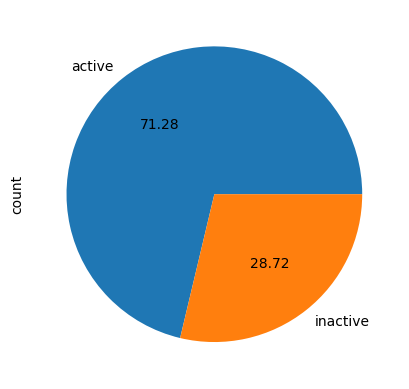

In [22]:
y.value_counts().plot.pie(autopct = '%.2f')

# Show pie plot (same as above) using matplotlib (Approach 2)

([<matplotlib.patches.Wedge at 0x7cd964348590>,
 [Text(-0.6818247054992795, 0.8632004813314349, 'active'),
  Text(0.6818247054992798, -0.8632004813314348, 'inactive')],
 [Text(-0.3719043848177888, 0.4708366261807826, '71.28'),
  Text(0.3719043848177889, -0.47083662618078254, '28.72')])

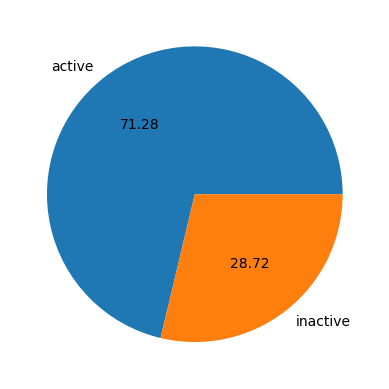

In [23]:
import matplotlib.pyplot as plt
fig1, ax1 = plt.subplots()
ax1.pie(y.value_counts(), autopct='%.2f', labels = y.value_counts().index)

# Random Sampling

There are 2 ways, Undersampling and Oversampling. There are more than one way of doing undersampling and oversampling as documented in the link.
https://imbalanced-learn.org/stable/references/index.html

## Random Undersampling
'not minority' = resample all classes but the minority class

Text(0.5, 1.0, 'Under-sampling')

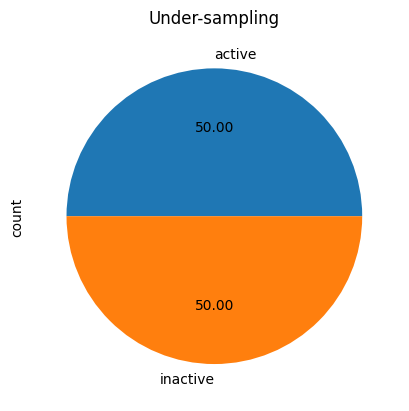

In [32]:
#here we reduce the majority class to match minority class
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy=1) #numerical argument b/w 0 & 1
#rus = RandomUnderSampler(sampling_strategy = 'not minority') #string argument method

X_res, y_res = rus.fit_resample(X, y)  #resampling

#new labels
y_res.value_counts().plot.pie(autopct = '%.2f').set_title("Under-sampling")

In [34]:
#reclass distribution
y_res.value_counts()

,count
Activity,
active,166
inactive,166


## Random OverSampling

Text(0.5, 1.0, 'Over-sampling')

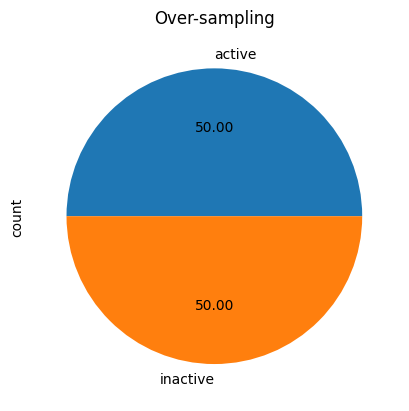

In [36]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy=1) #numerical argument b/w 0 & 1
#ros = RandomOverSampler(sampling_strategy = 'not majority') #string argument method

X_res, y_res = ros.fit_resample(X, y) #resamples

y_res.value_counts().plot.pie(autopct = '%.2f').set_title("Over-sampling")

In [37]:
#Class distribution

y_res.value_counts()

,count
Activity,
active,412
inactive,412
